<a href="https://colab.research.google.com/github/simbrizzy/Brizzy101/blob/master/ESG_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This is a mini project done to do sentiment analysis on the ESG topic by extracting tweets from Twitter. First, I was required to
#create a Twitter developer account so that I could access the APIs and be able to collect data
#so we begin by installing and importing the necessary packages
#tweepy: For accessing Twitter’s API and collecting tweets.
#pandas: used for data manipulation and analysis.
#nltk: Natural Language Toolkit, useful for text processing and cleaning.
#textblob: used for simple sentiment analysis and text processing.
#matplotlib and seaborn: used for data visualization.

In [ ]:
!pip install tweepy pandas nltk textblob matplotlib seaborn

In [ ]:
#Now we import al the packages
import tweepy
import pandas as pd
import re
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#The next step is to authenticate my developer account and be able to connect to it
#below are my API credentials
Consumer_key='lEt4clCuOANbLr0XSegk7n6MS'
Consumer_secret='cwmfNNeYZEqIRSP5cJ1Uso1R56sS7EY7Ck5s1D1rNxlQ3V9y5C'
Access_token='753682609-i0K8jSvsnQmLdoi4j5S16bn5VQLSTIoLasY2tcCp'
Access_token_secret='oi82yTf7srHD90D3Zek82iA6w5UFrN0qiLAGFfPFCzYyx'

#the below lines of code are used for authentication with twitter
auth =tweepy.OAuthHandler(Consumer_key, Consumer_secret)
auth.set_access_token(Access_token, Access_token_secret)

#Now we define the api object
api = tweepy.API(auth, wait_on_rate_limit=True)


In [ ]:
#testing if the authentication was successfull
try:
    user =api.verify_credentials()
    print("Authentication OK")
except Exception as e:
    print("Error during authentication:", e)

Authentication OK


In [ ]:
#Now that the authentication is ok, we can go ahead and extract five tweets and see the results
# but because I am using a limited access version, I’ll need to update the code for fetching tweets to work with v2 endpoints. This
#requires using the search_recent_tweets() function from tweepy, as search_tweets() is a v1.1 function and might be restricted for Free access accounts.
#therefore I proceed to use the code below
!pip install --upgrade tweepy
bearer_token = 'AAAAAAAAAAAAAAAAAAAAACKzwwEAAAAAwE0c8zATyGIyfm%2FCvsGnYVpkbQQ%3DEvoMip7sDJUleYIFu3Edpsea3k2mxYVKWXbRLaPTP0wef70xHj'
# Then I initilize the twitter API client v2
client = tweepy.Client(bearer_token=bearer_token, wait_on_rate_limit=True)

In [ ]:
query = "ESG OR sustainability OR climate change -is:retweet lang:en" # Searches for tweets containing "ESG," "sustainability," or "climate change" while excluding retweets (-is:retweet).
tweets = client.search_recent_tweets(query=query, max_results=100, tweet_fields=['created_at', 'text', 'author_id']) # this code extracts 100 tweets

# Displaying the tweets we use
for tweet in tweets.data:
    print(f"Tweet by {tweet.author_id} at {tweet.created_at}: {tweet.text}")

Tweet by 1283588570792497153 at 2024-11-12 19:55:12+00:00: 🚨Livestream!!!🚨

Prince Harry, Duke of Sussex named on the list of Time 100 Climate Change Leaders of 2024!

Link: https://t.co/AfZPhpjzh8

#PrinceHarry #DukeofSussex #SussexSquad #Time100 #SharionSade #KingCharles #PrinceAndrew #KateMiddleton @TIME https://t.co/HF8p0fzWdf
Tweet by 4297133723 at 2024-11-12 19:55:12+00:00: RT @cPenCoreTeam: 📢 #cPenNetwork Halving Event Update

The mining base rate has been adjusted to 0.19375 $pen per hour as we continue to gr…
Tweet by 1198284446153236485 at 2024-11-12 19:55:02+00:00: @DrRosena Dr Rosena, have you considered climate change might be increasing faster due to the sheer number of bombs being thrown on Gaza? When is Starmer going to bow to the electorate to stop the genocide rather than bowing to the rogue state raining bombs on #Gaza
Tweet by 1691499066 at 2024-11-12 19:55:01+00:00: Look at this news article from The Daily Caller: Energy Giant Wins Appeal In Landmark Lawsuit Blamin

In [ ]:

# Assuming `tweets` is the response data from Twitter API
tweet_data = []
for tweet in tweets.data:
    tweet_data.append({
        'author_id': tweet.author_id,
        'created_at': tweet.created_at,
        'text': tweet.text
    })

# Create DataFrame with the relevant columns
df = pd.DataFrame(tweet_data, columns=['author_id', 'created_at', 'text'])
print(df.head())

             author_id                created_at  \
0  1283588570792497153 2024-11-12 19:55:12+00:00   
1           4297133723 2024-11-12 19:55:12+00:00   
2  1198284446153236485 2024-11-12 19:55:02+00:00   
3           1691499066 2024-11-12 19:55:01+00:00   
4  1275034244532834306 2024-11-12 19:54:58+00:00   

                                                text  
0  🚨Livestream!!!🚨\n\nPrince Harry, Duke of Susse...  
1  RT @cPenCoreTeam: 📢 #cPenNetwork Halving Event...  
2  @DrRosena Dr Rosena, have you considered clima...  
3  Look at this news article from The Daily Calle...  
4  The geoengineering above Cheshire, UK was horr...  


In [ ]:
#Data Pre-processing
#Now we clean the text by removing URLs, mentions, hashtags, and other unnecessary parts.
def clean_text(text):
    text = re.sub(r'http\S+', '', text)  # Removes URLs
    text = re.sub(r'@\w+', '', text)     # Removes mentions
    text = re.sub(r'#', '', text)        # Removes hashtag symbol
    text = re.sub(r'\n', ' ', text)      # Removes new lines
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Removes non-alphanumeric characters
    return text

In [ ]:
df['Cleaned_text']=df['text'].apply(clean_text)
df.head()

,author_id,created_at,text,Cleaned_text
0,1283588570792497153,2024-11-12 19:55:12+00:00,"🚨Livestream!!!🚨\n\nPrince Harry, Duke of Susse...",Livestream Prince Harry Duke of Sussex named ...
1,4297133723,2024-11-12 19:55:12+00:00,RT @cPenCoreTeam: 📢 #cPenNetwork Halving Event...,RT cPenNetwork Halving Event Update The min...
2,1198284446153236485,2024-11-12 19:55:02+00:00,"@DrRosena Dr Rosena, have you considered clima...",Dr Rosena have you considered climate change ...
3,1691499066,2024-11-12 19:55:01+00:00,Look at this news article from The Daily Calle...,Look at this news article from The Daily Calle...
4,1275034244532834306,2024-11-12 19:54:58+00:00,"The geoengineering above Cheshire, UK was horr...",The geoengineering above Cheshire UK was horre...


In [ ]:
#Now that the text is cleaned, we use TextBlob to analyze sentiment polarity (where values range from -1 to 1
# Calculating sentiment polarity
df['polarity']=df['Cleaned_text'].apply(lambda x: TextBlob(x).sentiment.polarity)
# Labeling sentiments as positive, neutral, or negative
df['sentiment'] = df['polarity'].apply(lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral'))
# let us show the sentiment distribution using the code below
df['sentiment'].value_counts()


sentiment
neutral     40
positive    35
negative    25
Name: count, dtype: int64

C:\Users\bryan\AppData\Local\Temp\ipykernel_8908\3314454408.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=df, palette='viridis')


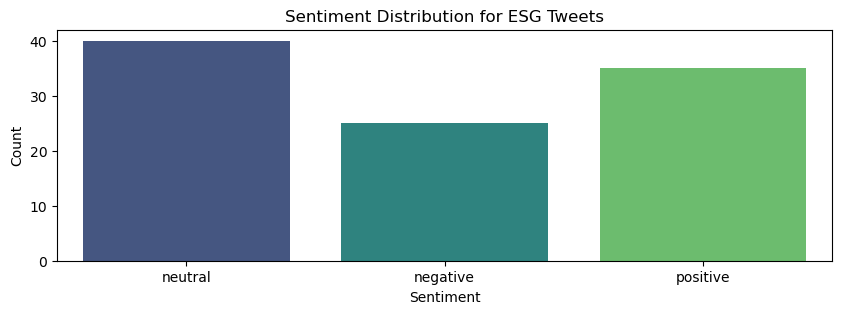

In [ ]:
# Plot sentiment distribution
plt.figure(figsize=(10, 3))
sns.countplot(x='sentiment', data=df, palette='viridis')
plt.title("Sentiment Distribution for ESG Tweets")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()


In [ ]:
print (df.columns)

Index(['author_id', 'created_at', 'text', 'Cleaned_text', 'polarity',
       'sentiment'],
      dtype='object')


In [ ]:
# Renaming the 'created_at' column to 'timestamp'
df = df.rename(columns={'created_at': 'timestamp'})
print(df.columns)

Index(['author_id', 'timestamp', 'text', 'Cleaned_text', 'polarity',
       'sentiment'],
      dtype='object')


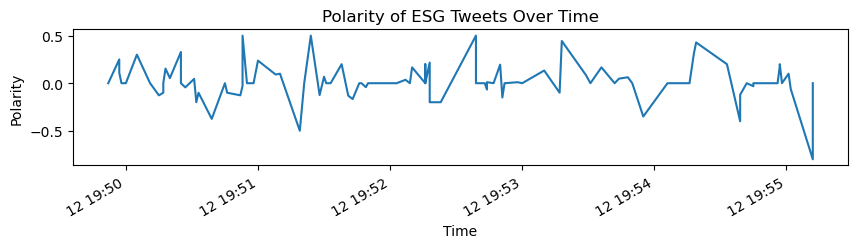

In [ ]:
# Plot polarity over time
plt.figure(figsize=(10, 2))
df.set_index('timestamp')['polarity'].plot()
plt.title("Polarity of ESG Tweets Over Time")
plt.xlabel("Time")
plt.ylabel("Polarity")
plt.show()

#Based on the sentiment analysis results:

#40% Neutral: Most tweets show a neutral sentiment, which could indicate that many discussions around ESG are factual or objective,
#focusing on information-sharing rather than strong opinions. This could be typical for topics involving regulations, reporting standards,
#or general ESG metrics.

#35% Positive: A substantial portion of tweets is positive, which may reflect support for ESG initiatives, optimism about sustainability trends,
#or encouragement of responsible corporate practices. This aligns with a positive public reception of sustainable and ethical practices in the
#business world.

#25% Negative: Although smaller, a significant portion shows negative sentiment, potentially indicating criticism or skepticism. These could be
#tweets addressing ESG controversies, challenges in meeting ESG goals, or doubts about companies' true commitment to sustainability.

#Overall Analysis:
#The sentiment distribution suggests a balanced view of ESG topics on Twitter, with a leaning toward neutrality and positivity.
#However, the presence of 25% negative tweets also suggests a segment of users who are critical or concerned about ESG-related matters.
#It may be beneficial to delve into the content of negative tweets to understand specific concerns, which could include greenwashing,
#regulatory issues,or corporate accountability.

In [ ]:
pwd

'C:\\Users\\bryan'